In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn import metrics

import os

In [2]:
def read_csv(filepath):
    return pd.read_csv(filepath, header=None)



In [3]:
def compute_confusion_matrix(true, predicted):
    plt.rcParams['figure.figsize'] = (16, 9)

    confusion_matrix = metrics.confusion_matrix(true, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=range(12))
    cm_display.plot()
    plt.show()



In [4]:
def compute_rmse(true, predicted):
    return np.sqrt(np.mean((predicted - true) ** 2))



In [5]:
# Read in the CSV files
current_dir = os.getcwd()

df_python = read_csv(current_dir+"/../../Phase2_ComparingOutputs_Benchmarking/python_output.csv")
df_c  = read_csv(current_dir+"/../../Phase2_ComparingOutputs_Benchmarking/c++_output3.csv")



In [6]:
# Rename the columns
df_python = df_python.rename(columns={0: "File", 1: "Prediction", 2: "Prob"})
df_c = df_c.rename(columns={0: "File", 1: "Prediction", 2: "Prob"})



In [7]:
# Compute the RMSE
rmse = compute_rmse(df_python.Prob.round(6), df_c.Prob.round(6))
print("RMSE between python and c++:", rmse)


RMSE between python and c++: 0.0


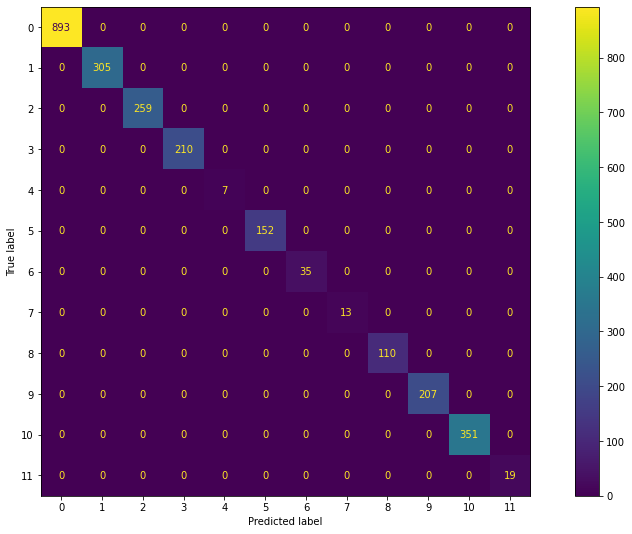

In [8]:

# Compute the confusion matrix
compute_confusion_matrix(df_python.Prediction, df_c.Prediction)



In [11]:
# Compute the number of mismatches between the Prob columns
mismatch_count = np.count_nonzero(df_python.Prob.round(6) != df_c.Prob.round(6))
print("Number of mismatches between python and c++:", mismatch_count)


Number of mismatches between python and c++: 0
